In [1]:
import pandas as pd
import cdt
import pickle
import networkx as nx
import matplotlib.pyplot as plt

Detecting 1 CUDA device(s).


In [2]:
# read data
df = pd.read_csv('../../data/session-df-ak.csv')
#df = pd.read_csv('../../data/training_set/log_mini.csv')
#df = pickle.load( open( "../../data/df_causal_discovery.p", "rb") )

In [3]:
df.columns

Index(['Unnamed: 0', 'session_id', 'session_position', 'session_length',
       'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'not_skipped',
       'context_switch', 'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'skip', 'custom_skip', 'pause_before_play', 'custom_pause_before_play'],
      dtype='object')

In [4]:
cols1 = [ 'hour_of_day', 'session_position', 'premium', 'session_length','hist_user_behavior_is_shuffle', 'custom_skip'] # , 'custom_pause_before_play'
df1 = df[cols1]
for col in cols1:
    df1[col] = df1[col].astype(int)
df1.rename(columns={'hist_user_behavior_is_shuffle':'shuffle'},inplace =True)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
df1

,hour_of_day,session_position,premium,session_length,shuffle,custom_skip
0,16,1,1,20,1,0
1,16,2,1,20,1,0
2,16,3,1,20,1,0
3,16,4,1,20,1,0
4,16,5,1,20,1,0
...,...,...,...,...,...,...
167875,13,16,1,20,0,0
167876,13,17,1,20,0,0
167877,13,18,1,20,0,0
167878,13,19,1,20,0,0


In [86]:
# x = pd.cut(df1["session_position"], bins = pd.IntervalIndex.from_tuples([(i,i+4) for i in range(0,20,4)]))
# df1["session_position_bin"], session_bins_unique = pd.factorize(x)
# session_bins_unique


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CategoricalIndex([(0, 4], (4, 8], (8, 12], (12, 16], (16, 20]], categories=[(0, 4], (4, 8], (8, 12], (12, 16], (16, 20]], ordered=True, dtype='category')

In [89]:
# x = pd.cut(df1["hour_of_day"], bins = pd.IntervalIndex.from_tuples([(i,i+3) for i in range(0,24,3)]))
# df1["hour_of_day_bin"], hour_of_day_bins_unique = pd.factorize(x)
# hour_of_day_bins_unique


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CategoricalIndex([(15, 18], (12, 15], (18, 21], (6, 9], (9, 12], (21, 24],
                  (0, 3], (3, 6]],
                 categories=[(0, 3], (3, 6], (6, 9], (9, 12], (12, 15], (15, 18], (18, 21], (21, 24]], ordered=True, dtype='category')

In [6]:
import pickle
skeleton = pickle.load(open("skeleton.pkl","rb"))

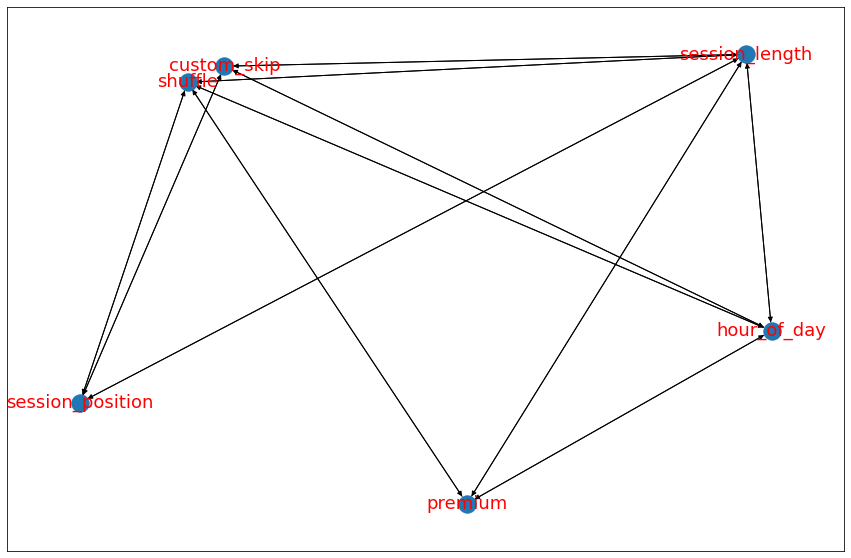

In [37]:
# Get skeleton graph
# initialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to data
skeleton = glasso.predict(df1)# visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

In [38]:

for i in df1.columns:
    try:
        skeleton.remove_edge("custom_skip",i)
    except Exception:
        print(i)
        pass

premium
shuffle


In [39]:
skeleton.remove_edge('premium','hour_of_day')
skeleton.remove_edge('hour_of_day','premium')

In [43]:
skeleton.add_edge("premium","shuffle")

In [42]:
skeleton.remove_edge("shuffle","hour_of_day")

In [44]:
skeleton.add_edge("premium","custom_skip")

In [45]:
skeleton.add_edge("shuffle","custom_skip")

In [47]:
skeleton.remove_edge("session_length","hour_of_day")

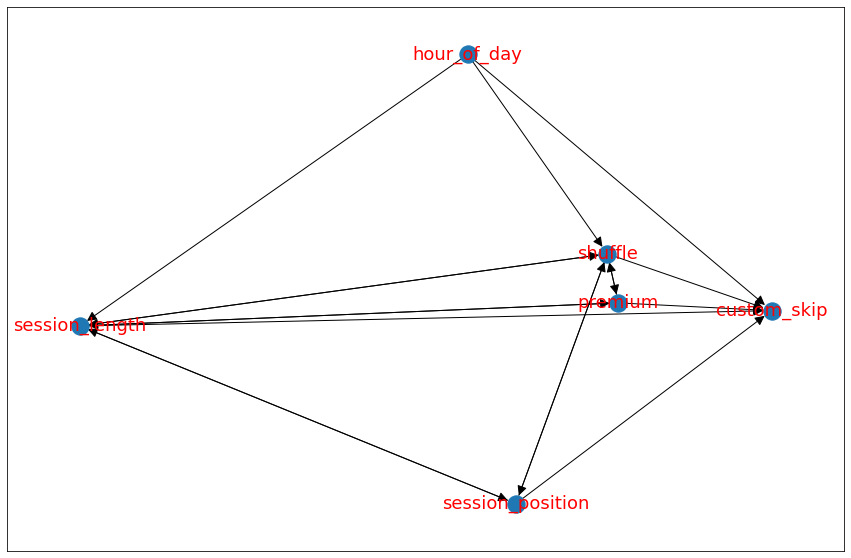

In [9]:
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r', arrowsize=20)


In [50]:
import pickle 
pickle.dump(skeleton,open("skeleton.pkl","wb"))

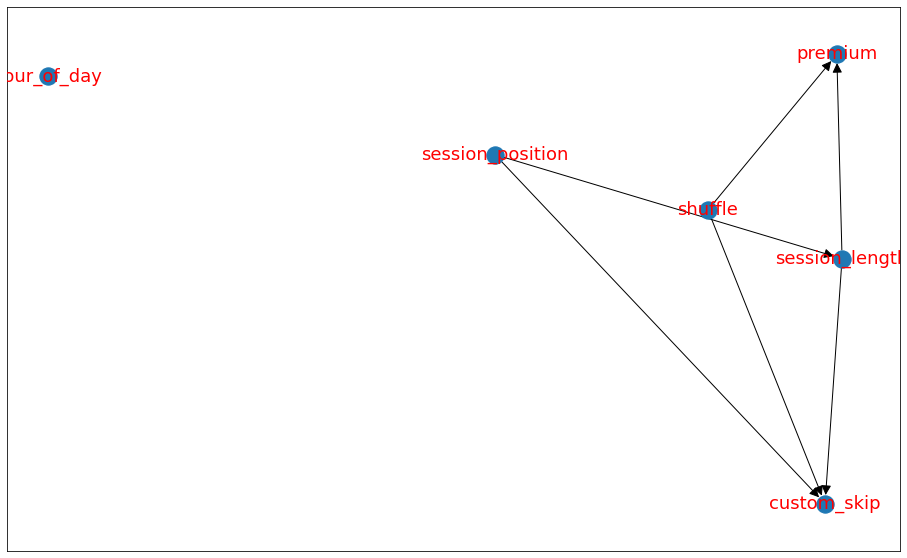

In [22]:
# LinGAM
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(df1)

# visualize network
fig=plt.figure(figsize=(16,10))
nx.draw_networkx(graph_lingam, font_size=18, font_color='r', arrowsize=20)

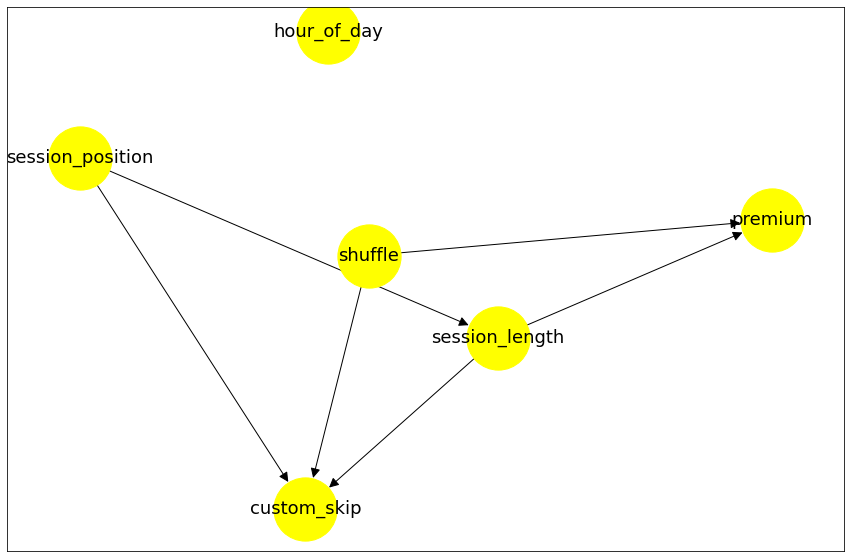

In [36]:
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_lingam, font_size=18,node_color="yellow" ,arrowsize=20,node_size=4000, arrowstyle= "-|>")

PC is ran on the skeleton of the given graph.


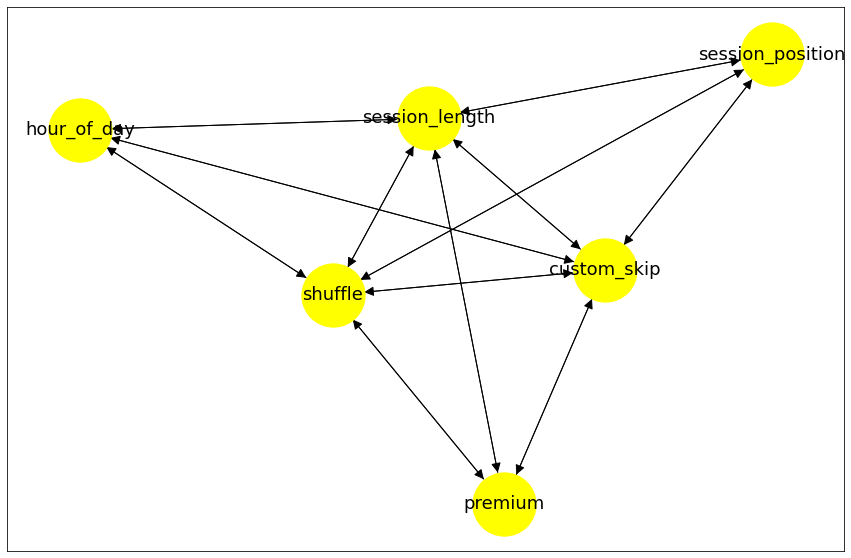

In [13]:
# PC Algorithm

model_pc = cdt.causality.graph.PC()

graph_pc = model_pc.predict(df1,skeleton)
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18,node_color="yellow" ,arrowsize=20,node_size=4000, arrowstyle= "-|>")


hour_of_day
custom_skip


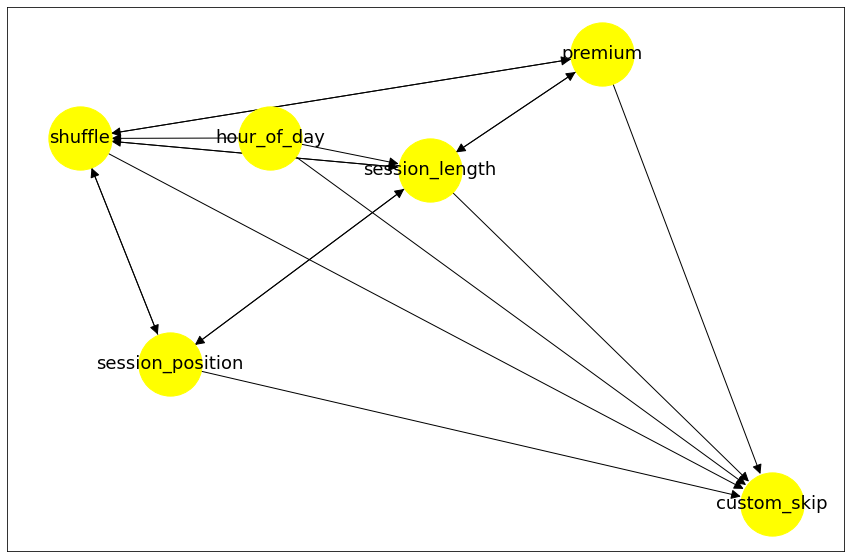

In [15]:
for i in df1.columns: 
    try:
        graph_pc.remove_edge("custom_skip",i)
    except Exception:
        print(i)
        pass

fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18,node_color="yellow" ,arrowsize=20,node_size=4000, arrowstyle= "-|>")

GIES is ran on the skeleton of the given graph.


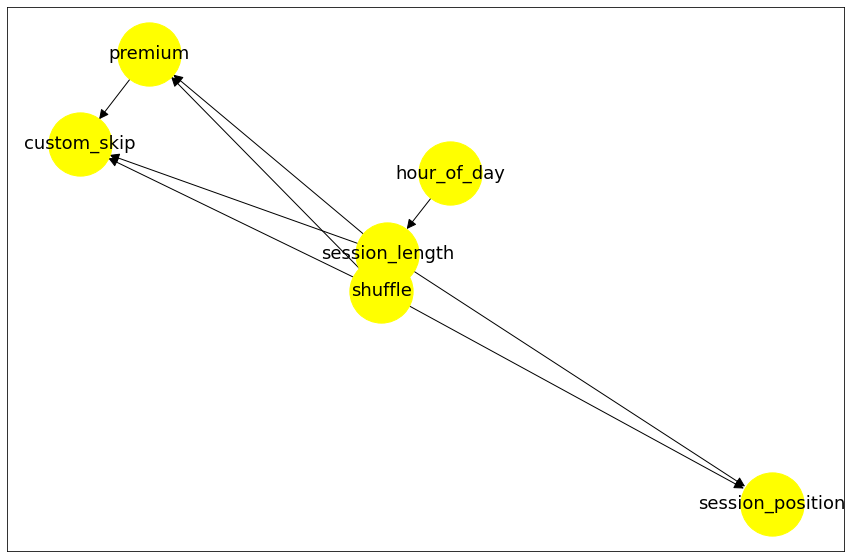

In [53]:
model_gies = cdt.causality.graph.GIES(score = "int")
graph_gies = model_gies.predict(df1,skeleton)
fig=plt.figure(figsize=(15,10))
graph_gies.remove_edge("custom_skip","premium")
nx.draw_networkx(graph_gies, font_size=18,node_color="yellow" ,arrowsize=20,node_size=4000, arrowstyle= "-|>")

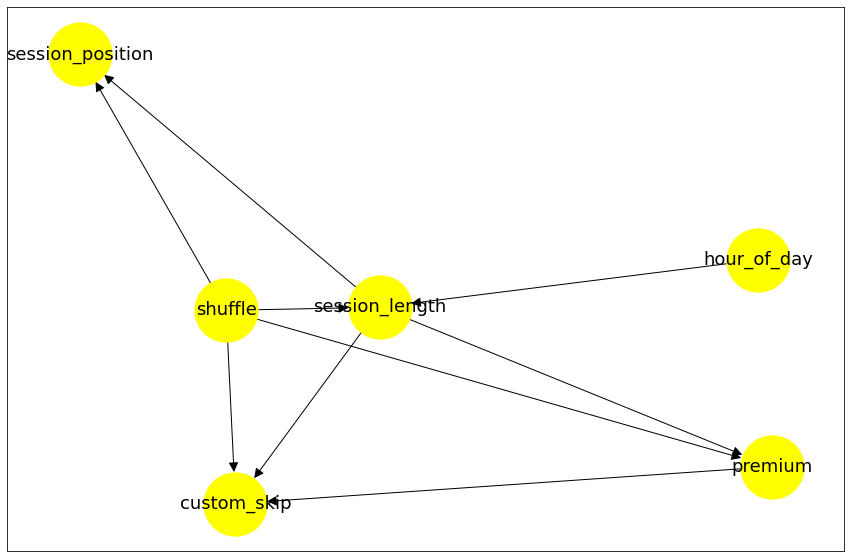

In [54]:
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_gies, font_size=18,node_color="yellow" ,arrowsize=20,node_size=4000)

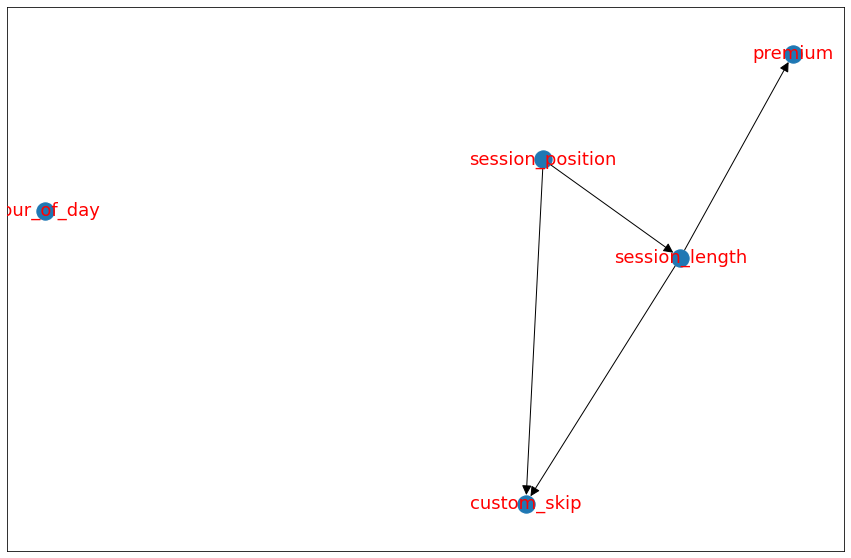

In [ ]:
# Use causal discovery to get causal models# PC algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(df1)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_lingam, font_size=18, font_color='r', arrowsize=20)

In [41]:
import graphviz
import numpy as np
def make_prior_knowledge_graph(prior_knowledge_matrix):
    d = graphviz.Digraph(engine='dot')

    labels = ['hour_of_day', 'session_position', 'premium', 'session_length',
       'custom_skip']
    for label in labels:
        d.node(label, label)

    dirs = np.where(prior_knowledge_matrix > 0)
    for to, from_ in zip(dirs[0], dirs[1]):
        d.edge(labels[from_], labels[to])

    dirs = np.where(prior_knowledge_matrix < 0)
    for to, from_ in zip(dirs[0], dirs[1]):
        if to != from_:
            d.edge(labels[from_], labels[to], style='dashed')
    return d

In [50]:
df1.columns

Index(['hour_of_day', 'session_position', 'premium', 'session_length',
       'custom_skip'],
      dtype='object')

In [45]:
prior_knowledge_matrix =np.array( [[-1,-1,-1,0,0],
                          [-1,-1,-1,0,0],
                          [-1,0,-1,0,0],
                          [-1,0,0,-1,0],
                          [-1,-1,-1,-1,-1]])

In [47]:
make_prior_knowledge_graph(prior_knowledge_matrix=prior_knowledge_matrix)

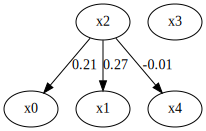

In [49]:
import lingam
from lingam.utils import make_dot
model = lingam.DirectLiNGAM(prior_knowledge=prior_knowledge_matrix)
model.fit(df1)

make_dot(model.adjacency_matrix_)

In [49]:
graph_gies.remove_edge("shuffle")



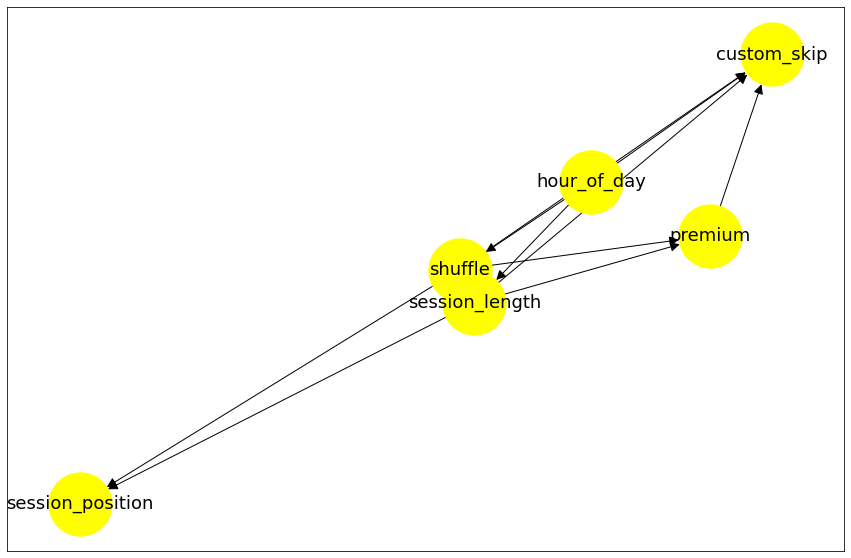

In [50]:
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_gies, font_size=18,node_color="yellow" ,arrowsize=20,node_size=4000)